# Evaluate the Topic Model

## Preparation

In [1]:
# enable showing matplotlib image inline
%matplotlib inline

# autoreload module
%load_ext autoreload
%autoreload 2

PROJECT_ROOT = "/"

def load_local_package():
    import os
    import sys
    root = os.path.join(os.getcwd(), "../../")
    sys.path.append(root)  # load project root
    return root

PROJECT_ROOT = load_local_package()

## Load Topic Model

In [14]:
def load_corpus(file_name, test_size=0.3):
    import os
    from pola.machine.topic_model import GTopicModel
    
    path = os.path.join(PROJECT_ROOT, "./data/" + file_name)
    m = GTopicModel.load(path)    
    return m

model = load_corpus("cityspots_doc_edited_model.gensim")

## Evaluate Topic Model

In [15]:
# show its perplexity
print("topic count is {0}. perplexity is {1}".format(model.topic_count, model.perplexity()))

topic count is 3. perplexity is 567.0421337395892


## Visualize Topic Model

### Check the distance between each topic

If we success to categorize the documents well, then the distance of each topic should be far apart.


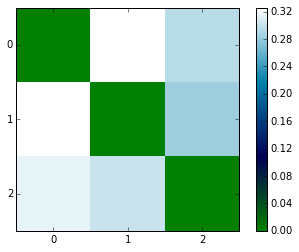

In [16]:
def plot_distance_matrix(m):
    import numpy as np
    import matplotlib.pylab as plt
    
    # make distance matrix
    mt = []
    for i in range(m.topic_count):
        d = m.calc_distances(i)
        d = sorted(d, key=lambda _d: _d[0])
        d.insert(i, (i, 0))
        d = [_d[1] for _d in d]
        mt.append(d)

    mt = np.array(mt)
    
    # plot matrix
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_aspect("equal")
    plt.imshow(mt, interpolation="nearest", cmap=plt.cm.ocean)
    plt.yticks(range(mt.shape[0]))
    plt.xticks(range(mt.shape[1]))
    plt.colorbar()
    plt.show()


plot_distance_matrix(model)


### Check the topics in documents

If we success to categorize the documents well, each document has one mainly topic.


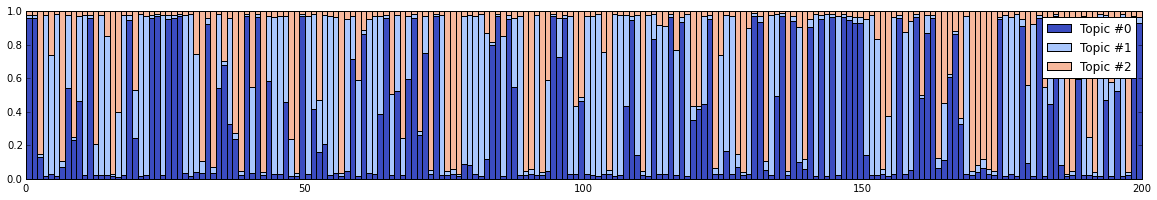

In [17]:
def show_document_topics(m, sample_size=200, width=1):
    import random
    import numpy as np
    import matplotlib.pylab as plt

    # make document/topics matrix
    document_topics = []
    samples = random.sample(range(len(m.doc.archives)), sample_size)
    for i in samples:
        ts = m.get_document_topics(i)
        document_topics.append([v[1] for v in ts])
    
    document_topics = np.array(document_topics)
    # draw cumulative bar chart
    fig = plt.figure(figsize=(20, 3))
    N, K = document_topics.shape
    indices = np.arange(N)
    height = np.zeros(N)
    bar = []
    for k in range(K):
        color = plt.cm.coolwarm(k / K, 1)
        p = plt.bar(indices, document_topics[:, k], width, bottom=None if k == 0 else height, color=color)
        height += document_topics[:, k]
        bar.append(p)
    
    plt.ylim((0, 1))
    plt.xlim((0, document_topics.shape[0]))
    topic_labels = ['Topic #{}'.format(k) for k in range(K)]
    plt.legend([b[0] for b in bar], topic_labels)
    plt.show(bar)

show_document_topics(model)


### Visualize words in topics

To consider about the name of topic, show the words in topics.


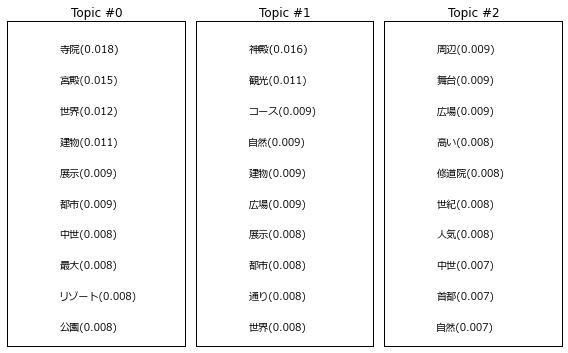

In [18]:
def visualize_topic(m, word_count=10, fontsize_base=10):
    import matplotlib.pylab as plt
    from matplotlib.font_manager import FontProperties
    font = lambda s: FontProperties(fname=r'C:\Windows\Fonts\meiryo.ttc', size=s)

    # get words in topic
    topic_words = []
    for t in range(m.topic_count):
        words = m.get_topic_words(t, topn=word_count)
        topic_words.append(words)
    
    # plot words
    fig = plt.figure(figsize=(8, 5))
    for i, ws in enumerate(topic_words):
        sub = fig.add_subplot(1, m.topic_count, i + 1)
        plt.ylim(0, word_count + 0.5)
        plt.xticks([])
        plt.yticks([])
        plt.title("Topic #{}".format(i))
        
        for j, (share, word) in enumerate(ws):
            size = fontsize_base + (fontsize_base * share * 2)
            w = "%s(%1.3f)" % (word, share)
            plt.text(0.3, word_count-j-0.5, w, ha="left", fontproperties=font(size))
    
    plt.tight_layout()
    plt.show()


visualize_topic(model)
